In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
base_dir = 'dataset'

# Define full paths for training and test directories
train_dir = os.path.join(base_dir, 'train_set')
test_dir = os.path.join(base_dir, 'test_set')

In [7]:
# Check the contents of directories
def check_directory_contents(directory):
    print(f"Checking files in '{directory}':")
    for subdir, _, files in os.walk(directory):
        print(f" {subdir}: {len(files)} files")

In [8]:
# Check contents of directories
check_directory_contents(train_dir)
check_directory_contents(test_dir)

Checking files in 'dataset\train_set':
 dataset\train_set: 0 files
 dataset\train_set\man: 12436 files
 dataset\train_set\woman: 6980 files
Checking files in 'dataset\test_set':
 dataset\test_set: 0 files
 dataset\test_set\man: 3108 files
 dataset\test_set\woman: 1744 files


In [9]:
# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [10]:
# Create data generators
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=False)

Found 19416 images belonging to 2 classes.
Found 4852 images belonging to 2 classes.


In [11]:
# Print some information about the data generators
print(f"Training set samples: {train_set.samples}")
print(f"Validation set samples: {test_set.samples}")
print(f"Training set class indices: {train_set.class_indices}")
print(f"Validation set class indices: {test_set.class_indices}")

Training set samples: 19416
Validation set samples: 4852
Training set class indices: {'man': 0, 'woman': 1}
Validation set class indices: {'man': 0, 'woman': 1}


In [12]:
# Update the optimizer configuration
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [13]:
from keras import Input

classifier = Sequential()
classifier.add(Input(shape=(64, 64, 3)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=2, activation='softmax'))

In [14]:
classifier.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
steps_per_epoch = train_set.samples // train_set.batch_size
validation_steps = test_set.samples // test_set.batch_size
classifier.fit(train_set, steps_per_epoch=steps_per_epoch, epochs=25, validation_data=test_set,
               validation_steps=validation_steps)

C:\Users\faiza\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 188s 307ms/step - accuracy: 0.7487 - loss: 0.5074 - val_accuracy: 0.8700 - val_loss: 0.3144
Epoch 2/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.8750 - loss: 0.3442 - val_accuracy: 0.8500 - val_loss: 0.3834
Epoch 3/25


C:\Users\faiza\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


606/606 ━━━━━━━━━━━━━━━━━━━━ 50s 83ms/step - accuracy: 0.8652 - loss: 0.3228 - val_accuracy: 0.8858 - val_loss: 0.2672
Epoch 4/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.8125 - loss: 0.3648 - val_accuracy: 0.8000 - val_loss: 0.4647
Epoch 5/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 53s 87ms/step - accuracy: 0.8838 - loss: 0.2828 - val_accuracy: 0.8928 - val_loss: 0.2477
Epoch 6/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.9062 - loss: 0.1911 - val_accuracy: 0.9500 - val_loss: 0.2498
Epoch 7/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 56s 92ms/step - accuracy: 0.8999 - loss: 0.2478 - val_accuracy: 0.9104 - val_loss: 0.2190
Epoch 8/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - accuracy: 0.9062 - loss: 0.2099 - val_accuracy: 0.8000 - val_loss: 0.3174
Epoch 9/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 57s 94ms/step - accuracy: 0.9081 - loss: 0.2249 - val_accuracy: 0.9145 - val_loss: 0.2169
Epoch 10/25
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.9375 - loss: 0.2078 - val_accuracy: 

In [16]:
# evaluate the model
scores = classifier.evaluate(test_set)
print(f"Accuracy: {round(scores[1] * 100, 2)}%")

152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9514 - loss: 0.1276
Accuracy: 93.08%


In [17]:
# Prediction of image
%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


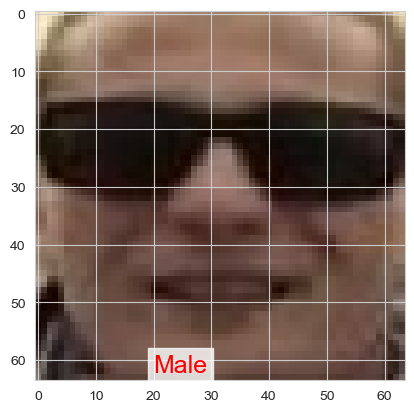

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


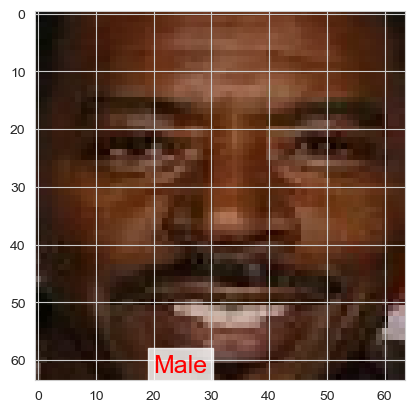

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


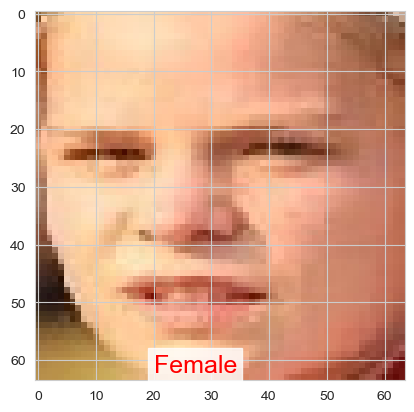

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


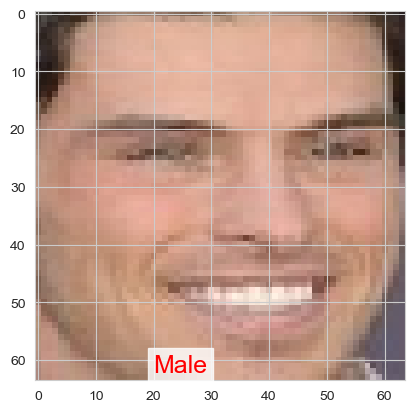

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


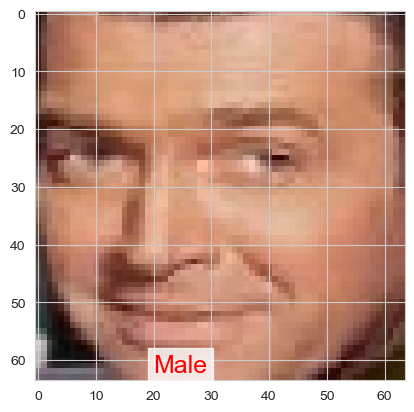

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


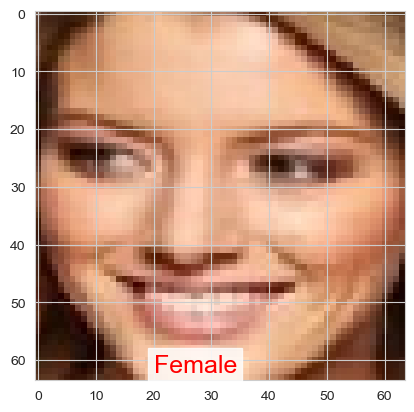

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


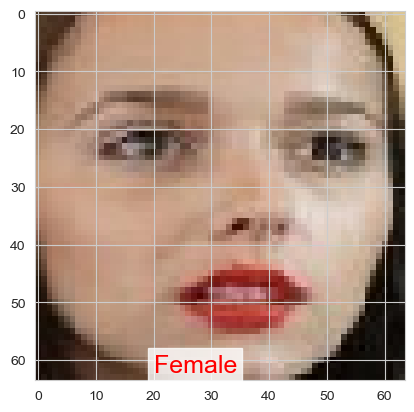

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


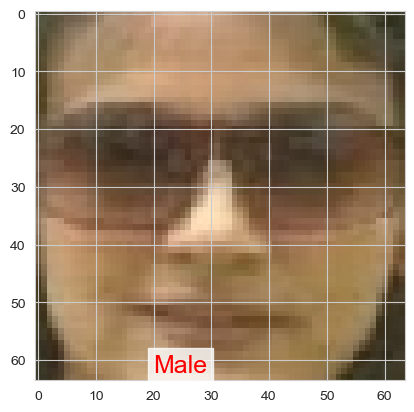

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


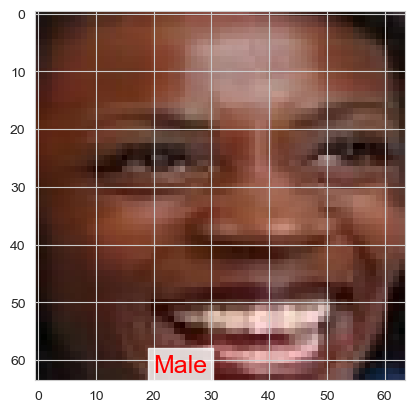

In [20]:
source_folder = "old_dataset/Test"
class_labels = ["Male", "Female"]
all_files = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
for file_name in all_files:
    my_image = image.load_img(os.path.join(source_folder, file_name), target_size=(64, 64))
    img = image.img_to_array(my_image)
    img = img / 255
    # create a batch of size 1 [N,H,W,C]
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None, steps=1)  # gives all class prob.
    predicted_class = class_labels[np.argmax(prediction)]
    plt.text(20, 62, predicted_class, color='red', fontsize=18, bbox=dict(facecolor='white', alpha=0.8))
    plt.imshow(my_image)
    plt.show()

In [23]:
# serialize model to JSON
model_json = classifier.to_json()
with open("models/GenderModel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("models/GenderModel.weights.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.5f' % x)
classifier.predict(test_set)

152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step


array([[9.99473631e-01, 5.26341842e-04],
       [9.98748660e-01, 1.25134434e-03],
       [9.99885321e-01, 1.14649105e-04],
       ...,
       [8.90603755e-04, 9.99109328e-01],
       [2.03374345e-02, 9.79662597e-01],
       [9.09269147e-04, 9.99090791e-01]], dtype=float32)

In [25]:
import pandas as pd

ytesthat = pd.DataFrame(classifier.predict(test_set))
df = pd.DataFrame({
    'filename': test_set.filenames,
    'y': test_set.classes
})

df['y_pred'] = ytesthat.idxmax(axis=1)
df.y_pred = df.y_pred.astype(int)
df

152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


,filename,y,y_pred
0,man\man_10003_face_0.jpg,0,0
1,man\man_10004_face_0.jpg,0,0
2,man\man_10009_face_0.jpg,0,0
3,man\man_10017_face_0.jpg,0,0
4,man\man_10019_face_0.jpg,0,0
...,...,...,...
4847,woman\woman_981_face_0.jpg,1,0
4848,woman\woman_986_face_0.jpg,1,1
4849,woman\woman_98_face_0.jpg,1,1
4850,woman\woman_999_face_0.jpg,1,1


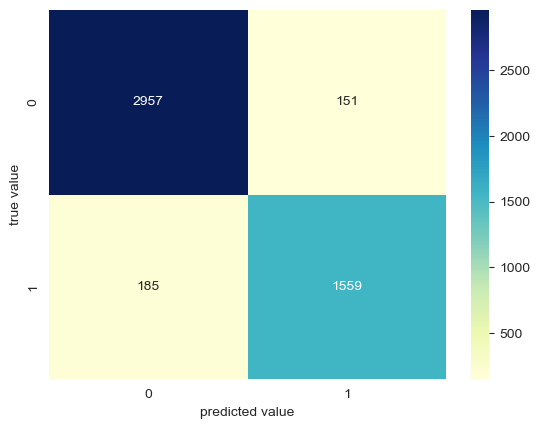

In [26]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y, df.y_pred)
sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True, fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()